## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Importing libraries

In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt

 from tqdm import tqdm

 import cv2

 from sklearn.preprocessing import LabelEncoder
 from sklearn.model_selection import train_test_split

 import tensorflow as tf
 from tensorflow.keras import layers
 from tensorflow.keras.models import Sequential, Model
 from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, MaxPooling2D, Flatten, GlobalAveragePooling2D, ZeroPadding2D
 from tensorflow.keras.callbacks import EarlyStopping
 from tensorflow.keras.optimizers import  Adam

 from tensorflow.keras.preprocessing import image
 from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator


 

### Load Dataset Files

In [ ]:
#loading Data from local instead of uploading them into Google Drive

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [2]:
project_path = "./DogBreed_Classification/"

In [ ]:
#Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [3]:
# from zipfile import ZipFile
# with ZipFile(project_path+'train.zip', 'r') as z:
#   z.extractall()

Repeat the same step for test.zip

In [4]:
# with ZipFile(project_path+'test.zip', 'r') as z:
#   z.extractall()

Repeat the same step for sample_submission.csv.zip

In [5]:
# with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
#   z.extractall()

Repeat the same step for labels.csv.zip

In [6]:
# with ZipFile(project_path+'labels.csv.zip', 'r') as z:
#   z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [7]:
labels_given = pd.read_csv("labels.csv")

In [8]:
labels_given.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [9]:
labels_given.groupby(by='breed').count()

,id
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
...,...
welsh_springer_spaniel,79
west_highland_white_terrier,81
whippet,95


### Get one-hot encodings of labels

In [11]:
le = LabelEncoder()

In [12]:
ohe = le.fit_transform(labels_given['breed'])

In [13]:
# creating the final labels
y = tf.keras.utils.to_categorical(ohe, num_classes=None, dtype='int')

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [14]:
x_train = []
y_train = []

for id, breed in tqdm(labels_given.values):
    x_image_train = cv2.imread("./train/{}.jpg".format(id),0)
    x_image_train_resized = cv2.resize(x_image_train,(128,128))
    x_train.append(x_image_train_resized)
    y_train.append(breed)


100%|██████████| 10222/10222 [00:20<00:00, 504.52it/s]


In [15]:
x_train[0].shape

(128, 128)

In [16]:
y_train[0]

'boston_bull'

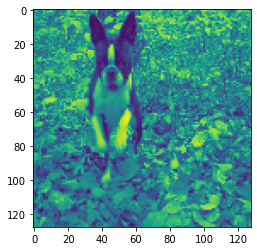

In [17]:
plt.imshow(x_train[0])

In [18]:
x_train[0].shape

(128, 128)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [19]:
x_train_info = np.array(x_train, np.float32)/255.0


In [20]:
x_train_info.shape

(10222, 128, 128)

In [21]:
x_train_info = np.expand_dims(x_train_info, axis=3)
x_train_info.shape

(10222, 128, 128, 1)

In [22]:
x_train_info[0].shape

(128, 128, 1)

In [23]:
y_train_info = np.array(y_train)

In [24]:
y_train_info.shape

(10222,)

In [25]:
y_train_info = pd.get_dummies(y_train_info, sparse=True).astype('float32')

In [26]:
y_train_info.shape

(10222, 120)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train_info, y_train_info, test_size=0.2, random_state=0)

In [28]:
X_train.shape

(8177, 128, 128, 1)

In [29]:
X_test.shape

(2045, 128, 128, 1)

In [30]:
Y_train.shape

(8177, 120)

In [31]:
Y_test.shape

(2045, 120)

In [32]:
8177+2045

10222

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [33]:
sample_labels_given = pd.read_csv("sample_submission.csv")
sample_labels_given.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [34]:
test_img = sample_labels_given['id']
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [35]:
img_rows = 128
img_cols = 128

x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:22<00:00, 462.73it/s]


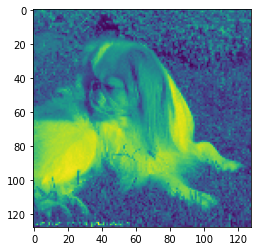

In [36]:
plt.imshow(x_test_feature[0])

Normalize the test data and convert it into 4 dimensions

In [37]:
len(x_test_feature)

10357

In [38]:
x_test_info = np.array(x_test_feature, np.float32)/255.0
x_test_info = np.expand_dims(x_test_info, axis=3)
x_test_info.shape

(10357, 128, 128, 1)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [39]:
def build_conv_nn():

    model = Sequential()

    model.add(Conv2D(32, 5, padding="same", activation='relu', input_shape=[128,128,1]))
    model.add(BatchNormalization(axis = 3, scale = False))
    model.add(MaxPooling2D(pool_size=(4,4), strides=(4,4), padding="same"))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, 3, padding="same", activation='relu', input_shape=[128,128,1]))
    model.add(BatchNormalization(axis = 3, scale = False))
    model.add(MaxPooling2D(pool_size=(4,4), strides=(4,4), padding="same"))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(units=256, activation='relu'))

    model.add(Dense(units=120, activation='softmax'))

    return model

In [40]:
model = build_conv_nn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      832       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      96        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        96        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

In [41]:
def compile_nn_model(model, optimizer, loss, metrics):
  
  model.compile(optimizer= optimizer, loss = loss, metrics = metrics)

  return model

In [42]:
optimizer = Adam(lr = 0.01)
model = compile_nn_model(model, optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      832       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      96        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        96        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

### Use batch_size = 128 and epochs = 10 and execute the model

In [43]:
batch_size = 128
epochs = 10

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), initial_epoch=0)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 6.8230 - accuracy: 0.0095 - val_loss: 4.7854 - val_accuracy: 0.0078
Epoch 2/10
8177/8177 [==============================] - 3s 402us/sample - loss: 4.7825 - accuracy: 0.0128 - val_loss: 4.7835 - val_accuracy: 0.0088
Epoch 3/10
8177/8177 [==============================] - 3s 400us/sample - loss: 4.7790 - accuracy: 0.0137 - val_loss: 4.7825 - val_accuracy: 0.0088
Epoch 4/10
8177/8177 [==============================] - 3s 394us/sample - loss: 4.7786 - accuracy: 0.0137 - val_loss: 4.7866 - val_accuracy: 0.0088
Epoch 5/10
8177/8177 [==============================] - 3s 388us/sample - loss: 4.7799 - accuracy: 0.0144 - val_loss: 4.7829 - val_accuracy: 0.0093
Epoch 6/10
8177/8177 [==============================] - 3s 390us/sample - loss: 4.7670 - accuracy: 0.0152 - val_loss: 4.7523 - val_accuracy: 0.0098
Epoch 7/10
8177/8177 [==============================] - 3s 391us/s

In [44]:
#changing epochs to 50 to check on the accuracy... 

In [45]:
batch_size = 128
epochs = 50

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), initial_epoch=0)

Train on 8177 samples, validate on 2045 samples
Epoch 1/50
8177/8177 [==============================] - 3s 412us/sample - loss: 4.6964 - accuracy: 0.0164 - val_loss: 4.7341 - val_accuracy: 0.0122
Epoch 2/50
8177/8177 [==============================] - 3s 402us/sample - loss: 4.6929 - accuracy: 0.0164 - val_loss: 4.7155 - val_accuracy: 0.0103
Epoch 3/50
8177/8177 [==============================] - 3s 400us/sample - loss: 4.6982 - accuracy: 0.0176 - val_loss: 4.7246 - val_accuracy: 0.0103
Epoch 4/50
8177/8177 [==============================] - 3s 401us/sample - loss: 4.6924 - accuracy: 0.0187 - val_loss: 4.7221 - val_accuracy: 0.0098
Epoch 5/50
8177/8177 [==============================] - 3s 400us/sample - loss: 4.6922 - accuracy: 0.0165 - val_loss: 4.7158 - val_accuracy: 0.0103
Epoch 6/50
8177/8177 [==============================] - 3s 403us/sample - loss: 4.6989 - accuracy: 0.0172 - val_loss: 4.7258 - val_accuracy: 0.0117
Epoch 7/50
8177/8177 [==============================] - 3s 400us

# The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [46]:
gen_train_data = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, fill_mode='nearest')



### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [47]:
train_generator = gen_train_data.flow(X_train, Y_train, 32)
val_generator = gen_train_data.flow(X_test, Y_test, 32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [48]:
history = model.fit_generator(train_generator, steps_per_epoch = 10, epochs = 10, validation_data=val_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 64 steps
Epoch 1/10
10/10 [==============================] - 6s 577ms/step - loss: 4.7713 - accuracy: 0.0094 - val_loss: 5.6320 - val_accuracy: 0.0064
Epoch 2/10
10/10 [==============================] - 5s 484ms/step - loss: 4.8210 - accuracy: 0.0063 - val_loss: 5.0717 - val_accuracy: 0.0088
Epoch 3/10
10/10 [==============================] - 5s 483ms/step - loss: 4.7983 - accuracy: 0.0219 - val_loss: 5.0650 - val_accuracy: 0.0088
Epoch 4/10
10/10 [==============================] - 5s 475ms/step - loss: 4.7034 - accuracy: 0.0312 - val_loss: 5.4177 - val_accuracy: 0.0132
Epoch 5/10
10/10 [==============================] - 5s 479ms/step - loss: 4.7505 - accuracy: 0.0094 - val_loss: 4.9190 - val_accuracy: 0.0132
Epoch 6/10
10/10 [==============================] - 5s 485ms/step - loss: 4.7900 - accuracy: 0.0156 - val_loss: 8.9752 - v

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [49]:
project_path

'./DogBreed_Classification/'

In [50]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [51]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [52]:
X_new = []

for id, label in tqdm(labels_given.values):
    X_new.append(base_model.predict(preprocess_input(np.expand_dims(img_to_array(image.load_img('./train/'+id+'.jpg', target_size=[128,128])),axis=0)))[0])

X = pd.DataFrame(X_new)

100%|██████████| 10222/10222 [09:10<00:00, 18.58it/s]


### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [53]:
bm = base_model.output
bm = Flatten()(bm)
bm = Dropout(0.2)(bm)

bm = Dense(1024, activation='relu', input_shape=(512,))(bm)
bm = Dense(256, activation='relu', input_shape=(512,))(bm)

p = Dense(120, activation='softmax')(bm)

model_tl = Model(inputs=base_model.input, outputs=p)


In [54]:
model_tl.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Make all the layers in the base_model (VGG16) to be non-trainable

In [55]:
for l in base_model.layers:
    l.trainable = False

    

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

In [70]:
model_tl.compile(optimizer=Adam(lr = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Try to get training and validation accuracy to be more than 90%

In [71]:
history = model_tl.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))

ValueError: Error when checking input: expected input_1 to have shape (None, None, 3) but got array with shape (128, 128, 1)

In [56]:
X_train_new = X

In [57]:
# batch_size = 128
# epochs = 50

# history = model_tl.fit(X_train_new, np.asarray(Y_train), batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), initial_epoch=0)

In [61]:
def build_conv_nn():
    model = Sequential()
    model.add(Dense(units=1024,activation='relu',))    
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=120, activation='softmax'))

    return model

def compile_nn_model(model, optimizer, loss, metrics):
  
  model.compile(optimizer= optimizer, loss = loss, metrics = metrics)

  return model

model = build_conv_nn()

In [66]:

optimizer = Adam(lr = 0.01)
model = compile_nn_model(model, optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
history = model.fit(np.asarray(X_train_new), np.asarray(Y_train), batch_size=batch_size, epochs=epochs, validation_data=(X_test, np.asarray(Y_test)), initial_epoch=0)

ValueError: Input arrays should have the same number of samples as target arrays. Found 10222 input samples and 8177 target samples.